In [1]:
# Importing required packages
import numpy as np
import pandas as pd 
import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Information Dataset

In [2]:
data = pd.read_csv('/kaggle/input/data-lombaa/lomba.csv')
data

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.81667,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.81667,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.81667,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.81667,-6.2,3630.9


In [3]:
forcluster = ['Tenure Months','Device Class','Monthly Purchase (Thou. IDR)','Churn Label']
datacluster = data[forcluster]

In [4]:
batas = [-1,12,48,73]
labelka =['New User (0-12 Months)','Intermediate User (13-48 Months)','Old User (49-72 Months)']
datacluster['Months'] = pd.cut(datacluster['Tenure Months'],bins=batas,labels=labelka)
data['Months']=  pd.cut(data['Tenure Months'],bins=batas,labels=labelka)

In [5]:
datacluster['Months'].value_counts()

Months
Intermediate User (13-48 Months)    2618
Old User (49-72 Months)             2239
New User (0-12 Months)              2186
Name: count, dtype: int64

In [6]:
datacluster['Device Class'].value_counts()

Device Class
High End    3096
Mid End     2421
Low End     1526
Name: count, dtype: int64

In [7]:
datacluster['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
datacluster=datacluster.drop('Tenure Months',axis=1)
datacluster

,Device Class,Monthly Purchase (Thou. IDR),Churn Label,Months
0,Mid End,70.005,Yes,New User (0-12 Months)
1,High End,91.910,Yes,New User (0-12 Months)
2,High End,129.545,Yes,New User (0-12 Months)
3,High End,136.240,Yes,Intermediate User (13-48 Months)
4,High End,134.810,Yes,Old User (49-72 Months)
...,...,...,...,...
7038,Low End,27.495,No,Old User (49-72 Months)
7039,Mid End,110.240,No,Intermediate User (13-48 Months)
7040,High End,134.160,No,Old User (49-72 Months)
7041,Mid End,38.480,No,New User (0-12 Months)


# Model With K-Prototypes

In [9]:
 kproto = KPrototypes(n_clusters=2, init='Huang', random_state=42)

In [10]:
inicluster = kproto.fit_predict(datacluster, categorical=[0,2,3])

In [11]:
df_clusters = pd.concat([data, pd.DataFrame({'cluster': inicluster})], axis=1)  
df_clusters

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Months,cluster
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7,New User (0-12 Months),0
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3,New User (0-12 Months),1
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6,New User (0-12 Months),1
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9,Intermediate User (13-48 Months),1
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0,Old User (49-72 Months),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.81667,-6.2,6897.8,Old User (49-72 Months),0
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.81667,-6.2,2782.0,Intermediate User (13-48 Months),1
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.81667,-6.2,7228.0,Old User (49-72 Months),1
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.81667,-6.2,3630.9,New User (0-12 Months),0


# Information After Clustering

In [12]:
cluster_0 = df_clusters[df_clusters['cluster'] == 0]
cluster_1 = df_clusters[df_clusters['cluster'] == 1]

In [13]:
cluster_0[['Monthly Purchase (Thou. IDR)','CLTV (Predicted Thou. IDR)']].describe()

,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
count,2934.000000,2934.000000
mean,43.464973,5603.548091
std,18.967299,1540.946957
min,23.725000,2603.900000
25%,26.130000,4330.625000
50%,32.825000,5750.550000
75%,63.765000,6919.575000
max,78.325000,8448.700000


In [14]:
cluster_0['Churn Label'].value_counts()

Churn Label
No     2439
Yes     495
Name: count, dtype: int64

In [15]:
cluster_0['Device Class'].value_counts()

Device Class
Low End    1526
Mid End    1408
Name: count, dtype: int64

In [16]:
cluster_0['Device Class'].value_counts()

Device Class
Low End    1526
Mid End    1408
Name: count, dtype: int64

In [17]:
cluster_0['Months'].value_counts()

Months
New User (0-12 Months)              1140
Intermediate User (13-48 Months)    1110
Old User (49-72 Months)              684
Name: count, dtype: int64

In [18]:
cluster_1[['Monthly Purchase (Thou. IDR)','CLTV (Predicted Thou. IDR)']].describe()

,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
count,4109.000000,4109.000000
mean,113.269737,5803.810611
std,18.323655,1530.586438
min,78.260000,2603.900000
25%,97.890000,4652.700000
50%,111.800000,5983.900000
75%,128.570000,7044.700000
max,154.375000,8450.000000


In [19]:
cluster_1['Churn Label'].value_counts()

Churn Label
No     2735
Yes    1374
Name: count, dtype: int64

In [20]:
cluster_1['Device Class'].value_counts()

Device Class
High End    3096
Mid End     1013
Name: count, dtype: int64

In [21]:
cluster_1['Months'].value_counts()

Months
Old User (49-72 Months)             1555
Intermediate User (13-48 Months)    1508
New User (0-12 Months)              1046
Name: count, dtype: int64

In [22]:
df_clusters['cluster'].value_counts()

cluster
1    4109
0    2934
Name: count, dtype: int64

# Visualisasi Data

In [23]:
df_clusters

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Months,cluster
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7,New User (0-12 Months),0
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3,New User (0-12 Months),1
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6,New User (0-12 Months),1
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9,Intermediate User (13-48 Months),1
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0,Old User (49-72 Months),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.81667,-6.2,6897.8,Old User (49-72 Months),0
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.81667,-6.2,2782.0,Intermediate User (13-48 Months),1
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.81667,-6.2,7228.0,Old User (49-72 Months),1
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.81667,-6.2,3630.9,New User (0-12 Months),0


In [24]:
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

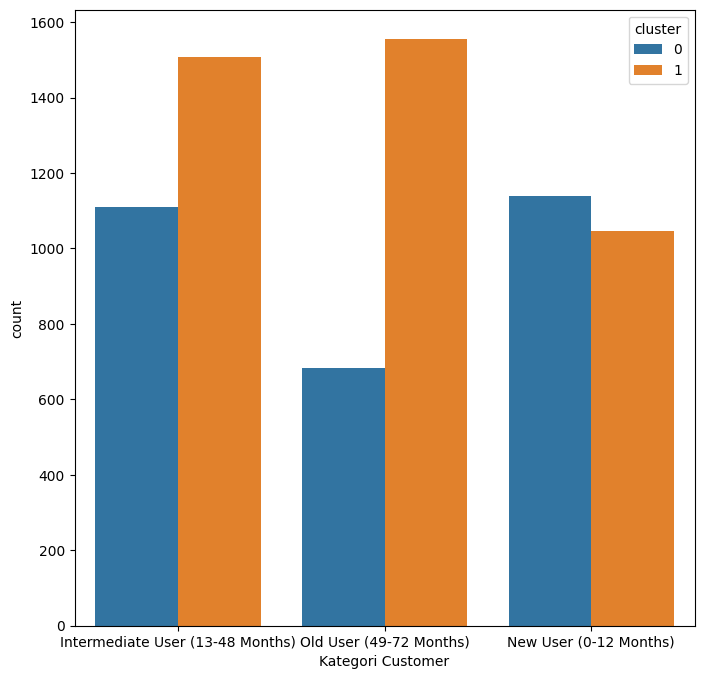

In [25]:
plt.subplots(figsize = (8,8))
sns.countplot(x=df_clusters['Months'],order=df_clusters['Months'].value_counts().index,hue=df_clusters['cluster'])
plt.xlabel('Kategori Customer')
plt.show()

From the above chart, it is found that users with sophisticated devices are highly profitable. Meanwhile,
users with outdated devices are less profitable. Based on the findings, the company can implement targeted
marketing campaigns to promote services or features that align with the preferences of users with
sophisticated devices. This may include highlighting advanced features, exclusive content, or premium
services. Explore partnerships with device manufacturers to provide exclusive bundles or collaborations.
This can create added value for users with sophisticated devices and attract new customers.

**Monthly Purchase (Thou. IDR)**

<Axes: xlabel='Monthly Purchase (Thou. IDR)', ylabel='Count'>

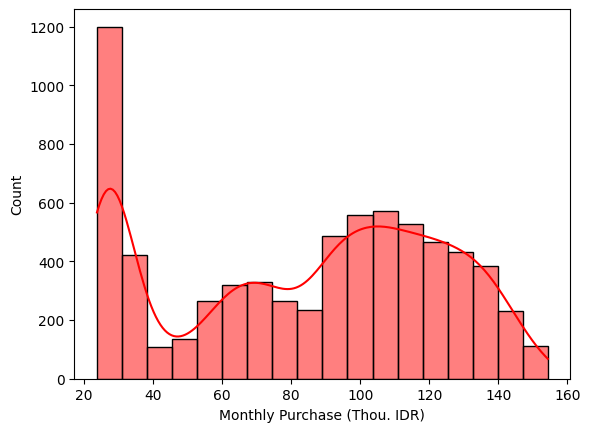

In [26]:
sns.histplot(df_clusters["Monthly Purchase (Thou. IDR)"], color="red", kde=True, label="Histogram")

<Axes: xlabel='Monthly Purchase (Thou. IDR)', ylabel='Count'>

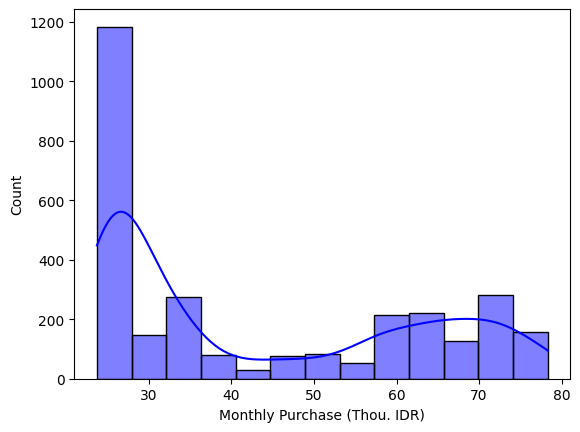

In [27]:
sns.histplot(cluster_0["Monthly Purchase (Thou. IDR)"], color="blue", kde=True, label="Histogram")

<Axes: xlabel='Monthly Purchase (Thou. IDR)', ylabel='Count'>

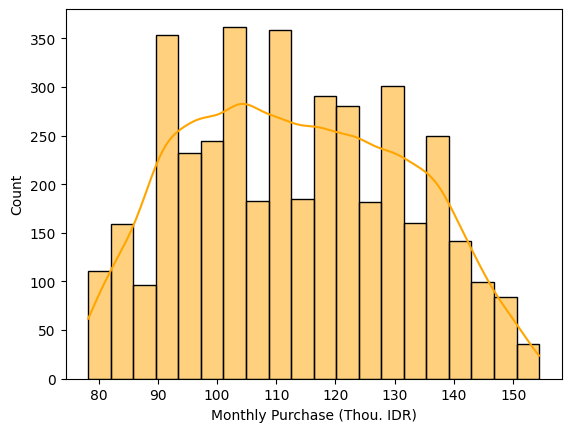

In [28]:
sns.histplot(cluster_1["Monthly Purchase (Thou. IDR)"], color="orange", kde=True, label="Histogram")

From the chart above, we can conclude that users with the highest monthly purchases belong to Cluster 1.
Based on the analysis indicating that users with the largest monthly purchases belong to Cluster 1, the
company can recognize and treat users in Cluster 1 as VIP customers. Implement special recognition
programs, exclusive benefits, or loyalty rewards to show appreciation for their higher spending. Then, design
targeted promotions and special offers for Cluster 0 users to incentivize increased spending. This could
include limited-time discounts, bundled services, or loyalty rewards for consistent monthly subscriptions

**Churn Label**

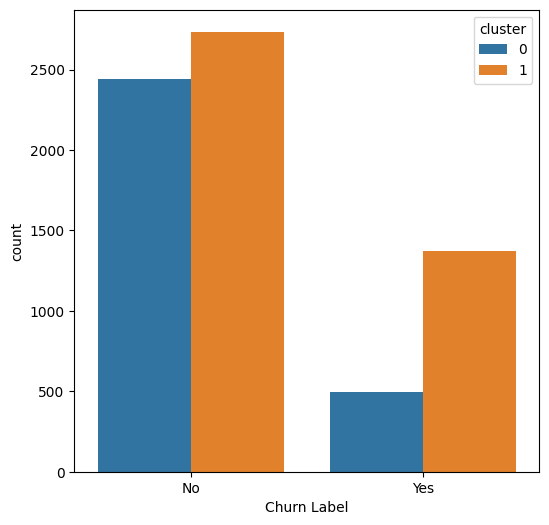

In [29]:
plt.subplots(figsize = (6,6))
sns.countplot(x=df_clusters['Churn Label'],order=df_clusters['Churn Label'].value_counts().index,hue=df_clusters['cluster'])
plt.show()

From the above chart, it is found that:
- Cluster 1 (profitable users): more users decide to continue their subscriptions.
- Cluster 0 (less profitable users): more users decide to continue their subscriptions.

So, company can focus on providing high-quality products or services, excellent customer service, and userfriendly platforms to ensure that customers remain satisfied and continue their subscriptions. Then, provide
incentives for customers to renew their subscriptions or upgrade to a higher tier, such as limited-time
promotions or discounts for existing subscribers

**Device Class**

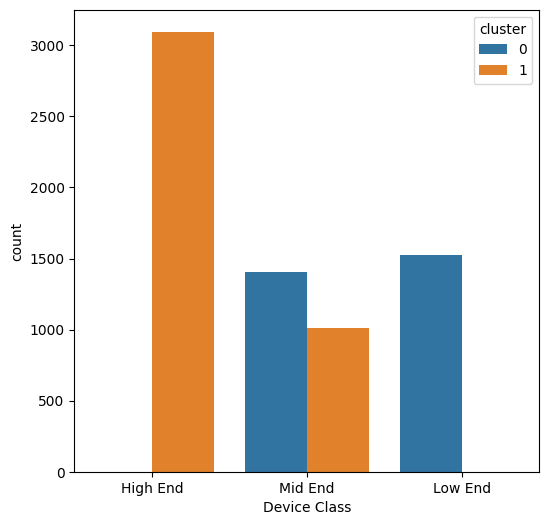

In [30]:
plt.subplots(figsize = (6,6))
sns.countplot(x=df_clusters['Device Class'],order=df_clusters['Device Class'].value_counts().index,hue=df_clusters['cluster'])
plt.show()

From the above chart, it is found that users with sophisticated devices are highly profitable. Meanwhile,
users with outdated devices are less profitable. Based on the findings, the company can implement targeted
marketing campaigns to promote services or features that align with the preferences of users with
sophisticated devices. This may include highlighting advanced features, exclusive content, or premium
services. Explore partnerships with device manufacturers to provide exclusive bundles or collaborations.
This can create added value for users with sophisticated devices and attract new customers.

**Games Product**

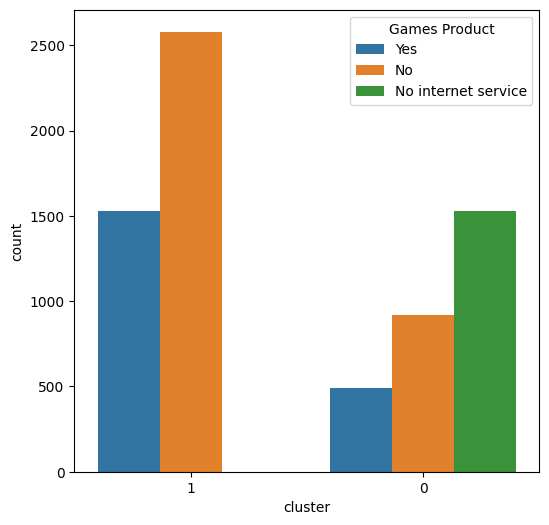

In [31]:
plt.subplots(figsize = (6,6))
sns.countplot(x=df_clusters['cluster'],order=df_clusters['cluster'].value_counts().index,hue=df_clusters['Games Product'])
plt.show()

**Music Product**

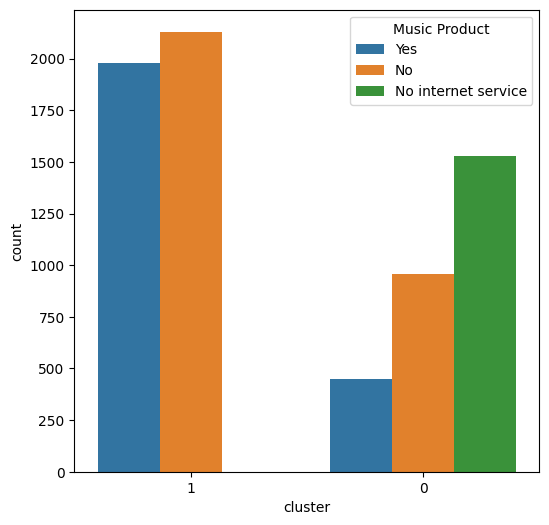

In [32]:
plt.subplots(figsize = (6,6))
sns.countplot(x=df_clusters['cluster'],order=df_clusters['cluster'].value_counts().index,hue=df_clusters['Music Product'])
plt.show()

**Music Product**

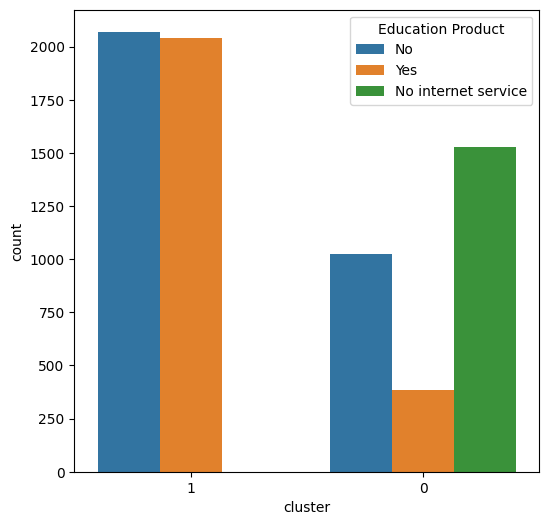

In [33]:
plt.subplots(figsize = (6,6))
sns.countplot(x=df_clusters['cluster'],order=df_clusters['cluster'].value_counts().index,hue=df_clusters['Education Product'])
plt.show()

**Video Product**

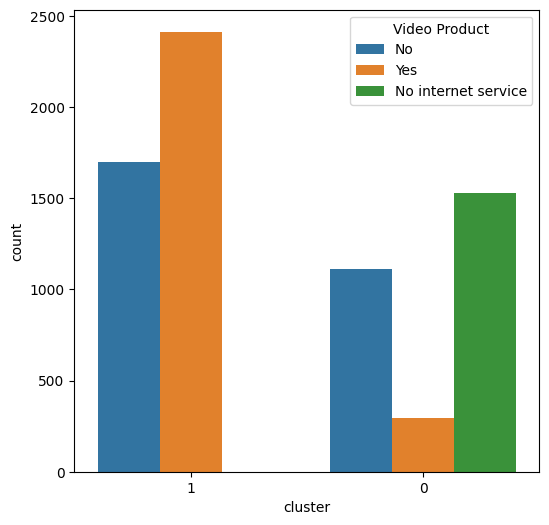

In [34]:
plt.subplots(figsize = (6,6))
sns.countplot(x=df_clusters['cluster'],order=df_clusters['cluster'].value_counts().index,hue=df_clusters['Video Product'])
plt.show()

Optional = (Use MyApp,Payment Method,Call Center)

In [35]:
product1 = ['Games Product','cluster']
product2 = ['Music Product','cluster']
product3 = ['Education Product','cluster']
product4 = ['Video Product','cluster']
data_games_1 = cluster_1[product1]
data_music_1 = cluster_1[product2]
data_edu_1 = cluster_1[product3]
data_video_1 = cluster_1[product4]
data_games_0 = cluster_0[product1]
data_music_0 = cluster_0[product2]
data_edu_0 = cluster_0[product3]
data_video_0 = cluster_0[product4]


In [36]:
data_games_1_yes = data_games_1[data_games_1['Games Product'] == 'Yes']
data_music_1_yes = data_music_1[data_music_1['Music Product'] == 'Yes']
data_edu_1_yes = data_edu_1[data_edu_1['Education Product'] == 'Yes']
data_video_1_yes = data_video_1[data_video_1['Video Product'] == 'Yes']

In [37]:
data_games_0_yes = data_games_0[data_games_0['Games Product'] == 'Yes']
data_music_0_yes = data_music_0[data_music_0['Music Product'] == 'Yes']
data_edu_0_yes = data_edu_0[data_edu_0['Education Product'] == 'Yes']
data_video_0_yes = data_video_0[data_video_0['Video Product'] == 'Yes']

In [38]:
data_games_1_yes['Games Product'].value_counts()

Games Product
Yes    1530
Name: count, dtype: int64

In [39]:
data_music_1_yes['Music Product'].value_counts()

Music Product
Yes    1979
Name: count, dtype: int64

In [40]:
data_edu_1_yes['Education Product'].value_counts()

Education Product
Yes    2039
Name: count, dtype: int64

In [41]:
data_video_1_yes['Video Product'].value_counts()

Video Product
Yes    2413
Name: count, dtype: int64

In [42]:
data_games_0_yes['Games Product'].value_counts()

Games Product
Yes    489
Name: count, dtype: int64

In [43]:
data_music_0_yes['Music Product'].value_counts()

Music Product
Yes    450
Name: count, dtype: int64

In [44]:
data_edu_0_yes['Education Product'].value_counts()

Education Product
Yes    383
Name: count, dtype: int64

In [45]:
data_video_0_yes['Video Product'].value_counts()

Video Product
Yes    294
Name: count, dtype: int64

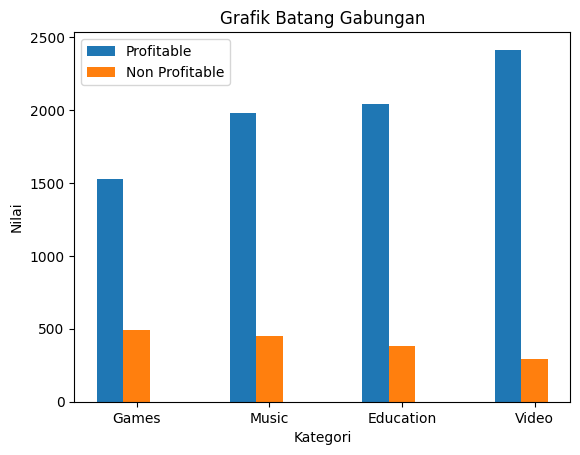

In [46]:
import matplotlib.pyplot as plt


cluster1 = [1530, 1979, 2039, 2413 ]
cluster0 = [489, 450, 383, 294]


combined_data = [cluster1, cluster0]


labels = ['Games', 'Music', 'Education', 'Video']


fig, ax = plt.subplots()
width = 0.2
for i, data in enumerate(combined_data):
    x = [j + i * width for j in range(len(data))]
    ax.bar(x, data, width=width, label=f'Data {i+1}')


ax.set_xlabel('Kategori')
ax.set_ylabel('Nilai')
ax.set_title('Grafik Batang Gabungan')


ax.set_xticks([j + width for j in range(len(data))])
ax.set_xticklabels(labels)


legenda = ['Profitable','Non Profitable']
ax.legend(legenda)


plt.show()

From the chart above, the most profitable users are those who use video services. Conversely, the least
profitable users are those who use game services. Based on the analysis, the company can focus on
maximizing revenue from video services by introducing premium plans, exclusive content, or personalized
recommendations to enhance user engagement and satisfaction. Evaluate and optimize the game service
offering to increase profitability. This may involve introducing new features, collaborating with popular game
developers, or implementing targeted promotions to attract more users. Implement cross-promotions
between video and game services to encourage users to explore and subscribe to both. Bundling or offering
discounts for combined subscriptions can attract a broader audience and increase overall revenue.

In [47]:
# For save as CSV file
df_clusters.to_csv('/kaggle/working/iniclusterrr.csv',sep=',', index=False)